In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 3\Lab 3\iris-data.csv')

In [3]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [32]:
data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class', 'is_duplicate'],
      dtype='object')

In [5]:
#searching for outliers using describe data
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Check for missing data : 5 in the column petal_width 
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
# Mean for the column petal_width_cm
data['petal_width_cm'].mean()

1.2365517241379318

In [8]:
# Replace missing data by the mean 
data['petal_width_cm']=data['petal_width_cm'].fillna(data['petal_width_cm'].mean())

In [9]:
#Check if we still have missing values in the column 'petal_width_cm'
data['petal_width_cm'].isnull().sum()

0

In [10]:
#check for any duplicates - Create a column result is False so no duplicates in DataFrame
data["is_duplicate"]= data.duplicated()


In [11]:
data['is_duplicate'].value_counts() 

False    148
True       2
Name: is_duplicate, dtype: int64

In [17]:
# Our duplicates to delete
data[data['is_duplicate']]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,is_duplicate
37,4.9,3.1,1.5,0.1,Iris-setossa,True
142,5.8,2.7,5.1,1.9,Iris-virginica,True


In [18]:
data = data.drop(index=[37,142])

In [19]:
data.shape

(148, 6)

In [20]:
#Check the number of class: 3 but we have spelling errors
data['class'].value_counts() 

Iris-versicolor    50
Iris-setossa       49
Iris-virginica     49
Name: class, dtype: int64

In [21]:
data['class'].replace(to_replace='Iris-setosa', value= 'Iris-setossa', inplace= True)
data['class'].replace(to_replace='versicolor', value= 'Iris-versicolor', inplace= True)


In [22]:
data['class'].value_counts() 

Iris-versicolor    50
Iris-setossa       49
Iris-virginica     49
Name: class, dtype: int64

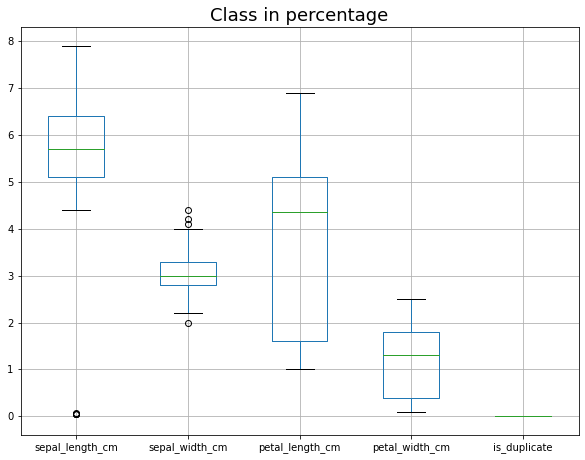

In [41]:
#Box plot 
plt.figure(figsize=[10, 7.5])
data.boxplot()
plt.title('Class in percentage', fontsize = 18)
plt.show()

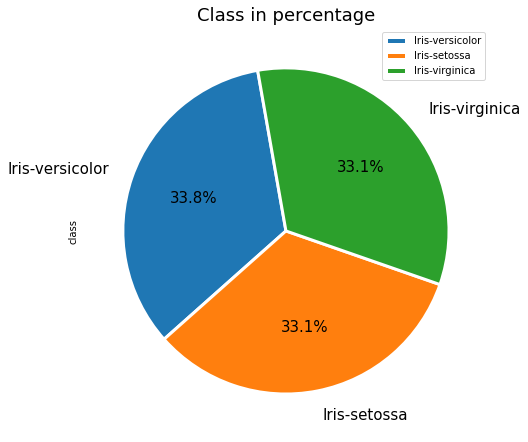

In [31]:
#Pie plot - Class
plt.figure(figsize=[10, 7.5])
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=100, legend = True, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, fontsize=15)    

plt.title('Class in percentage', fontsize = 18)
plt.show()


In [44]:
data.to_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 3\Lab 3\Iris_newfile.csv') 